### 합성곱 신경망 (convolution neural network)



CNN은 비전 처리에서 많이 응용되는 기술로 convolution layer라는 것이 추가된다.

Convolution layer는 수학적 operation인 convolution에서 원리를 가져왔으며 이미지 처리에 있어 일종의 필터 역할을 한다.

이 단원에서는 CNN의 수학적 구조를 자세히 알아보기 보다는 적용 예제 중심으로 내용을 체크해 본다.

In [1]:
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))

# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
print(weights)

[array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]]), array([0.])]


In [2]:
# store the weights in the model
model.set_weights(weights)

# apply filter to input data
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


#### 간단한 예제

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
#download mnist data and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

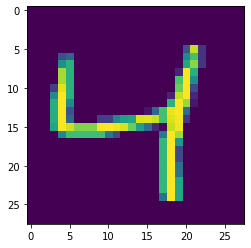

In [5]:
plt.imshow(train_images[2])
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

CNN은 배치(batch) 크기를 제외하고 (이미지 높이, 이미지 너비, 컬러 채널) 크기의 텐서(tensor)를 입력으로 받는다. 

MNIST 데이터는 (흑백 이미지이기 때문에) 컬러 채널(channel)이 하나지만 컬러 이미지는 (R,G,B) 세 개의 채널을 가진다.

이 예에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하는 CNN을 정의한다. 

이 값을 첫 번째 층의 input_shape 매개변수로 전달합니다.

In [7]:
#create model
model = keras.models.Sequential()
#add model layers
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [9]:
(3*3 +1) * 64

640

In [10]:
(3*3*64 +1) * 32

18464

처음 2개의 레이어는 Conv2D 레이어로 2차원 행렬인 입력 이미지를 처리할 컨볼루션 레이어이다.

첫 번째 레이어의 64와 두 번째 레이어의 32는 각 레이어의 노드 수를 나타낸다. 

이 숫자는 데이터 세트의 크기에 따라 더 높거나 낮게 조정할 수 있다. 

kernel_size는 컨볼루션에 대한 필터 행렬의 크기이다. 따라서 커널 크기가 3이면 3x3 필터 행렬을 갖게된다. 

즉 첫 번째 레이어는 3x3 크기의 64개의 필터를 갖는다.

In [11]:
temp = keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:2])

In [12]:
temp

<tf.Tensor: shape=(2, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [13]:
keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:1])

<tf.Tensor: shape=(1, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train the model
model.fit(train_images[:20000], train_labels[:20000], epochs=5)

Epoch 1/5
625/625 [==============================] - 40s 64ms/step - loss: 0.4714 - accuracy: 0.8612
Epoch 2/5
625/625 [==============================] - 42s 67ms/step - loss: 0.0637 - accuracy: 0.9804
Epoch 3/5
625/625 [==============================] - 38s 61ms/step - loss: 0.0404 - accuracy: 0.9874
Epoch 4/5
625/625 [==============================] - 34s 54ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 5/5
625/625 [==============================] - 32s 51ms/step - loss: 0.0180 - accuracy: 0.9948


### 풀링 층

풀링 층은 계산량과 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 subsample을 만드는 것이다.

풀링 뉴런은 가중치가 따로 없고, 최대나 평균 같은 합산 함수를 이용해 입력값을 더한다.

MaxPool2D, AvgPool2D 등이 있다.



In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3392 - accuracy: 0.8949
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0499 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0332 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0214 - accuracy: 0.9940


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.0353 - accuracy: 0.9890


In [22]:
print(test_acc)

0.9890000224113464


####  CNN 구조

전형적인 CNN 구조는 합성곱 층을 몇 개 쌓고, 각각 ReLu 층을 그 뒤에 두고, 그 다음에 풀링층을 쌓고, 그 다음에 또 합성곱 층을 몇 개 더 쌓고 그 다음에 풀링 층을 다시 쌓는 식이다.

네트워크를 통과할수록 이미지는 작아지지만 합성곱 층 때문에 일반적으로 점점 깊어져 더 많은 특성 맵을 지닌다.

지난 몇년간 이 기본구조에서 많은 변종이 개발되어 많은 성과를 이끌어 냈다.

대표적으로는 LeNet-5 구조, AlexNet, GoogLeNet, ResNet 등이 있다.